## LLM 을 활용한 어플리케이션 제작

@author: 테디노트
- [랭체인 온라인 교재](https://wikidocs.net/book/14314)
- [랭체인 한국어 튜토리얼](https://github.com/teddylee777/langchain-kr)
- [YouTube 테디노트](https://www.youtube.com/@teddynote)

In [1]:
# API KEY를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()

True

## ChatOpenAI

OpenAI 사의 채팅 전용 Large Language Model(llm) 입니다.

객체를 생성할 때 다음을 옵션 값을 지정할 수 있습니다. 옵션에 대한 상세 설명은 다음과 같습니다.

`temperature`

- 사용할 샘플링 온도는 0과 2 사이에서 선택합니다. 0.8과 같은 높은 값은 출력을 더 무작위하게 만들고, 0.2와 같은 낮은 값은 출력을 더 집중되고 결정론적으로 만듭니다.

`max_tokens`

- 채팅 완성에서 생성할 토큰의 최대 개수입니다.

`model_name`: 적용 가능한 모델 리스트
- `gpt-3.5-turbo`
- `gpt-4-turbo`
- `gpt-4o`

- 링크: https://platform.openai.com/docs/models


In [2]:
from langchain_openai import ChatOpenAI

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    model_name="gpt-4o",  # 모델명
)

# 질의내용
question = "대한민국의 수도는 어디인가요?"

# 질의
print(f"[답변]: {llm.invoke(question)}")

[답변]: content='대한민국의 수도는 서울입니다. 서울은 대한민국의 정치, 경제, 문화의 중심지로서 많은 인구와 다양한 명소를 자랑하는 도시입니다.' response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 16, 'total_tokens': 52}, 'model_name': 'gpt-4o', 'system_fingerprint': 'fp_3aa7262c27', 'finish_reason': 'stop', 'logprobs': None} id='run-d50e7f07-3bf6-4024-be7d-998afc9d60be-0' usage_metadata={'input_tokens': 16, 'output_tokens': 36, 'total_tokens': 52}


### 답변의 형식(AI Message)

In [3]:
# 질의내용
question = "대한민국의 수도는 어디인가요?"

# 질의
response = llm.invoke(question)

In [4]:
response

AIMessage(content='대한민국의 수도는 서울입니다. 서울은 대한민국의 정치, 경제, 문화의 중심지로서 많은 인구와 다양한 문화적, 역사적 명소를 가지고 있습니다.', response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 16, 'total_tokens': 54}, 'model_name': 'gpt-4o', 'system_fingerprint': 'fp_3cd8b62c3b', 'finish_reason': 'stop', 'logprobs': None}, id='run-997508d3-a550-464a-a501-d22c407cae1f-0', usage_metadata={'input_tokens': 16, 'output_tokens': 38, 'total_tokens': 54})

In [5]:
response.content

'대한민국의 수도는 서울입니다. 서울은 대한민국의 정치, 경제, 문화의 중심지로서 많은 인구와 다양한 문화적, 역사적 명소를 가지고 있습니다.'

In [6]:
response.response_metadata

{'token_usage': {'completion_tokens': 38,
  'prompt_tokens': 16,
  'total_tokens': 54},
 'model_name': 'gpt-4o',
 'system_fingerprint': 'fp_3cd8b62c3b',
 'finish_reason': 'stop',
 'logprobs': None}

### 스트리밍 출력

스트리밍 옵션은 질의에 대한 답변을 실시간으로 받을 때 유용합니다.

In [7]:
# 스트림 방식으로 질의
# answer 에 스트리밍 답변의 결과를 받습니다.
answer = llm.stream("대한민국의 아름다운 관광지 10곳과 주소를 알려주세요!")

In [8]:
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
for token in answer:
    print(token.content, end="", flush=True)

물론입니다! 대한민국에는 아름다운 관광지가 많이 있습니다. 아래는 그 중 10곳과 그 주소입니다.

1. **경복궁**
   - 주소: 서울특별시 종로구 사직로 161

2. **부산 해운대 해수욕장**
   - 주소: 부산광역시 해운대구 우동

3. **제주도 한라산 국립공원**
   - 주소: 제주특별자치도 제주시 1100로

4. **경주 불국사**
   - 주소: 경상북도 경주시 불국로 385

5. **설악산 국립공원**
   - 주소: 강원도 속초시 설악산로 833

6. **남이섬**
   - 주소: 강원도 춘천시 남산면 남이섬길 1

7. **안동 하회마을**
   - 주소: 경상북도 안동시 풍천면 하회종가길 40

8. **전주 한옥마을**
   - 주소: 전라북도 전주시 완산구 기린대로 99

9. **서울 남산타워 (N서울타워)**
   - 주소: 서울특별시 용산구 남산공원길 105

10. **순천만 국가정원**
    - 주소: 전라남도 순천시 국가정원1호길 47

이 관광지들은 각기 다른 매력을 가지고 있어 다양한 경험을 할 수 있습니다. 즐거운 여행 되세요!

In [9]:
from langchain_teddynote.messages import stream_response

# 스트림 방식으로 질의
# answer 에 스트리밍 답변의 결과를 받습니다.
answer = llm.stream("대한민국의 아름다운 관광지 10곳과 주소를 알려주세요!")
stream_response(answer)

물론입니다! 대한민국에는 아름다운 관광지가 많이 있습니다. 다음은 그 중에서도 유명한 10곳과 그 주소입니다:

1. **경복궁**
   - 주소: 서울특별시 종로구 사직로 161

2. **부산 해운대 해수욕장**
   - 주소: 부산광역시 해운대구 우동

3. **제주도 한라산 국립공원**
   - 주소: 제주특별자치도 제주시 1100로 2070-61

4. **경주 불국사**
   - 주소: 경상북도 경주시 불국로 385

5. **설악산 국립공원**
   - 주소: 강원도 속초시 설악산로 833

6. **남이섬**
   - 주소: 강원도 춘천시 남산면 남이섬길 1

7. **전주 한옥마을**
   - 주소: 전라북도 전주시 완산구 기린대로 99

8. **안동 하회마을**
   - 주소: 경상북도 안동시 풍천면 하회종가길 40

9. **서울 남산타워 (N서울타워)**
   - 주소: 서울특별시 용산구 남산공원길 105

10. **순천만 국가정원**
    - 주소: 전라남도 순천시 국가정원1호길 47

이 외에도 대한민국에는 많은 아름다운 관광지가 있으니, 기회가 되신다면 여러 곳을 방문해 보세요!

## 멀티모달 모델(이미지 인식)

멀티모달은 여러 가지 형태의 정보(모달)를 통합하여 처리하는 기술이나 접근 방식을 의미합니다. 이는 다음과 같은 다양한 데이터 유형을 포함할 수 있습니다.

- 텍스트: 문서, 책, 웹 페이지 등의 글자로 된 정보
- 이미지: 사진, 그래픽, 그림 등 시각적 정보
- 오디오: 음성, 음악, 소리 효과 등의 청각적 정보
- 비디오: 동영상 클립, 실시간 스트리밍 등 시각적 및 청각적 정보의 결합

`gpt-4o` 나 `gpt-4-turbo` 모델은 이미지 인식 기능(Vision) 이 추가되어 있는 모델입니다.

In [10]:
from langchain_teddynote.models import MultiModal
from langchain_teddynote.messages import stream_response

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-4o",  # 모델명
)

# 멀티모달 객체 생성
multimodal_llm = MultiModal(llm)


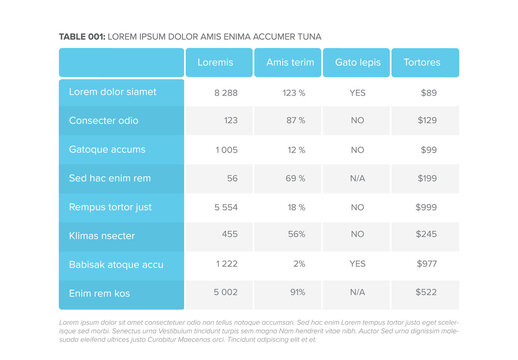

이 이미지는 표 형식의 데이터 테이블을 보여줍니다. 표의 제목은 "TABLE 001: LOREM IPSUM DOLOR AMIS ENIMA ACCUMER TUNA"입니다. 표는 다섯 개의 열로 구성되어 있으며, 각 열의 제목은 다음과 같습니다: "Loremis", "Amis terim", "Gato lepis", "Tortores". 

각 행의 데이터는 다음과 같습니다:
1. "Lorem dolor siamet": 8,288, 123%, YES, $89
2. "Consecter odio": 123, 87%, NO, $129
3. "Gatoque accums": 1,005, 12%, NO, $199
4. "Sed hac enim rem": 56, 69%, N/A, $199
5. "Rempus tortor just": 5,554, 18%, NO, $999
6. "Klimas nsecter": 455, 56%, NO, $245
7. "Babliask atque accu": 1,222, 2%, YES, $977
8. "Enim rem kos": 5,002, 91%, N/A, $522

표의 하단에는 작은 글씨로 "Lorem ipsum dolor sit amet consectetur..."로 시작하는 긴 설명 문구가 있습니다.

In [11]:
# 샘플 이미지 주소(웹사이트로 부터 바로 인식)
IMAGE_URL = "https://t3.ftcdn.net/jpg/03/77/33/96/360_F_377339633_Rtv9I77sSmSNcev8bEcnVxTHrXB4nRJ5.jpg"

# 이미지 파일로 부터 질의
answer = multimodal_llm.stream(IMAGE_URL)
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)


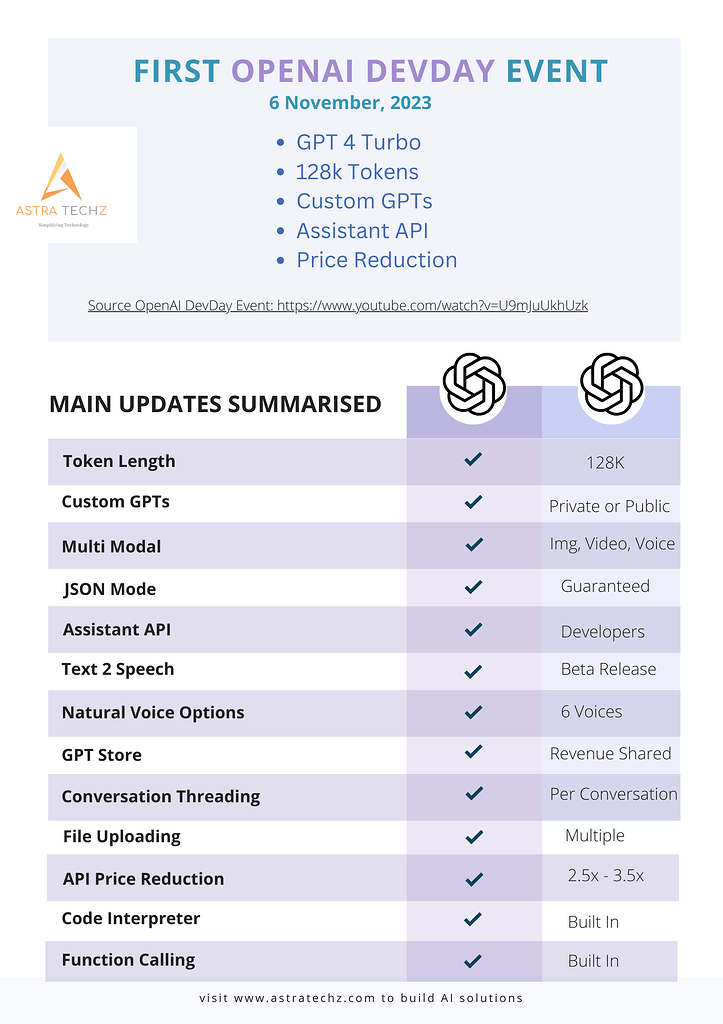

이미지 설명 대체 텍스트:

이미지에는 "FIRST OPENAI DEVDAY EVENT"라는 제목이 있으며, 날짜는 2023년 11월 6일로 표시되어 있습니다. 주요 업데이트 사항으로는 GPT 4 Turbo, 128k Tokens, Custom GPTs, Assistant API, 가격 인하가 나열되어 있습니다. 

이미지 왼쪽 상단에는 "ASTRA TECHZ" 로고가 있습니다. 

이미지 중앙에는 "MAIN UPDATES SUMMARISED"라는 제목 아래 주요 업데이트 사항이 요약되어 있습니다. 각 항목 옆에는 체크 표시가 있습니다:

- Token Length: 128K
- Custom GPTs: Private or Public
- Multi Modal: Img, Video, Voice
- JSON Mode: Guaranteed
- Assistant API: Developers
- Text 2 Speech: Beta Release
- Natural Voice Options: 6 Voices
- GPT Store: Revenue Shared
- Conversation Threading: Per Conversation
- File Uploading: Multiple
- API Price Reduction: 2.5x - 3.5x
- Code Interpreter: Built In
- Function Calling: Built In

이미지 하단에는 "visit www.astratechz.com to build AI solutions"라는 문구가 있습니다.

In [12]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "./assets/sample-image.png"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm.stream(IMAGE_PATH_FROM_FILE)
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)

## System, User 프롬프트 수정

In [15]:
system_prompt = """당신은 표(재무제표) 를 해석하는 금융 AI 어시스턴트 입니다. 
당신의 임무는 주어진 테이블 형식의 재무제표를 바탕으로 흥미로운 사실을 정리하여 친절하게 답변하는 것입니다."""

user_prompt = """당신에게 주어진 표는 회사의 재무제표 입니다. 흥미로운 사실을 정리하여 답변하세요."""

# 멀티모달 객체 생성
multimodal_llm_with_prompt = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)


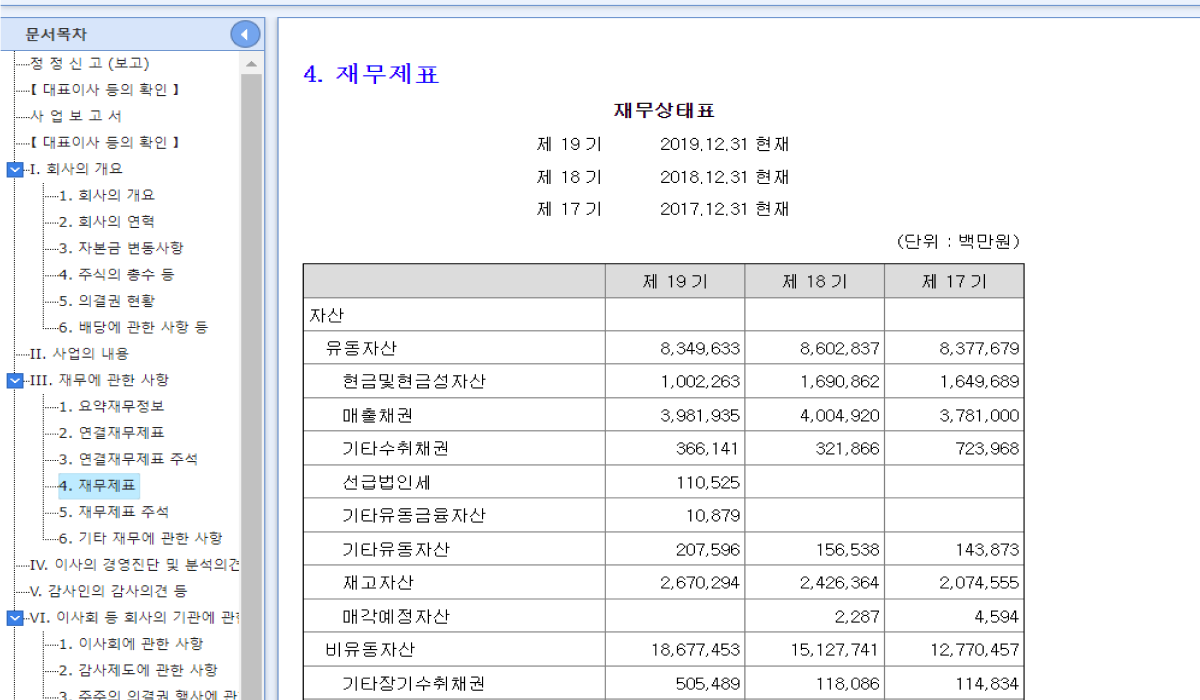

주어진 재무제표를 분석한 결과, 다음과 같은 흥미로운 사실들을 발견할 수 있습니다:

1. **유동자산의 변화**:
   - 제 19기(2019년) 유동자산은 8,349,633백만원으로, 제 18기(2018년) 8,602,837백만원에 비해 감소했습니다.
   - 특히 현금 및 현금성 자산이 제 18기 1,690,862백만원에서 제 19기 1,002,263백만원으로 크게 감소했습니다.

2. **매출채권의 변화**:
   - 매출채권은 제 18기 4,004,920백만원에서 제 19기 3,981,935백만원으로 소폭 감소했습니다.

3. **기타수취채권의 변화**:
   - 기타수취채권은 제 18기 321,866백만원에서 제 19기 366,141백만원으로 증가했습니다.

4. **선급법인세**:
   - 선급법인세는 제 18기 0백만원에서 제 19기 110,525백만원으로 새롭게 발생했습니다.

5. **기타유동금융자산**:
   - 기타유동금융자산은 제 18기 0백만원에서 제 19기 10,879백만원으로 새롭게 발생했습니다.

6. **비유동자산의 변화**:
   - 비유동자산은 제 18기 15,127,741백만원에서 제 19기 18,677,453백만원으로 크게 증가했습니다.
   - 특히 매각예정자산이 제 18기 2,287백만원에서 제 19기 0백만원으로 감소했습니다.

7. **기타장기수취채권**:
   - 기타장기수취채권은 제 18기 118,086백만원에서 제 19기 505,489백만원으로 크게 증가했습니다.

이러한 변화들은 회사의 자산 구조와 재무 상태에 중요한 영향을 미칠 수 있으며, 특히 현금성 자산의 감소와 비유동자산의 증가가 눈에 띕니다. 이는 회사의 자산 운용 전략이나 투자 활동의 변화를 시사할 수 있습니다.

In [16]:
# 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "https://storage.googleapis.com/static.fastcampus.co.kr/prod/uploads/202212/080345-661/kwon-01.png"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm_with_prompt.stream(IMAGE_PATH_FROM_FILE)

# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)

HTML 코드 생성 예제

In [23]:
system_prompt = """당신은 웹사이트를 만드는 HTML 코드를 생성하는 AI 입니다. """

user_prompt = """당신의 임무는 주어진 이미지를 바탕으로 웹사이트를 만드는 HTML 코드를 생성하는 것입니다.
좌우에는 여백을 주고, 인스타그램 스타일로 코드를 생성하세요.
"""

# 멀티모달 객체 생성
multimodal_llm_with_prompt = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)


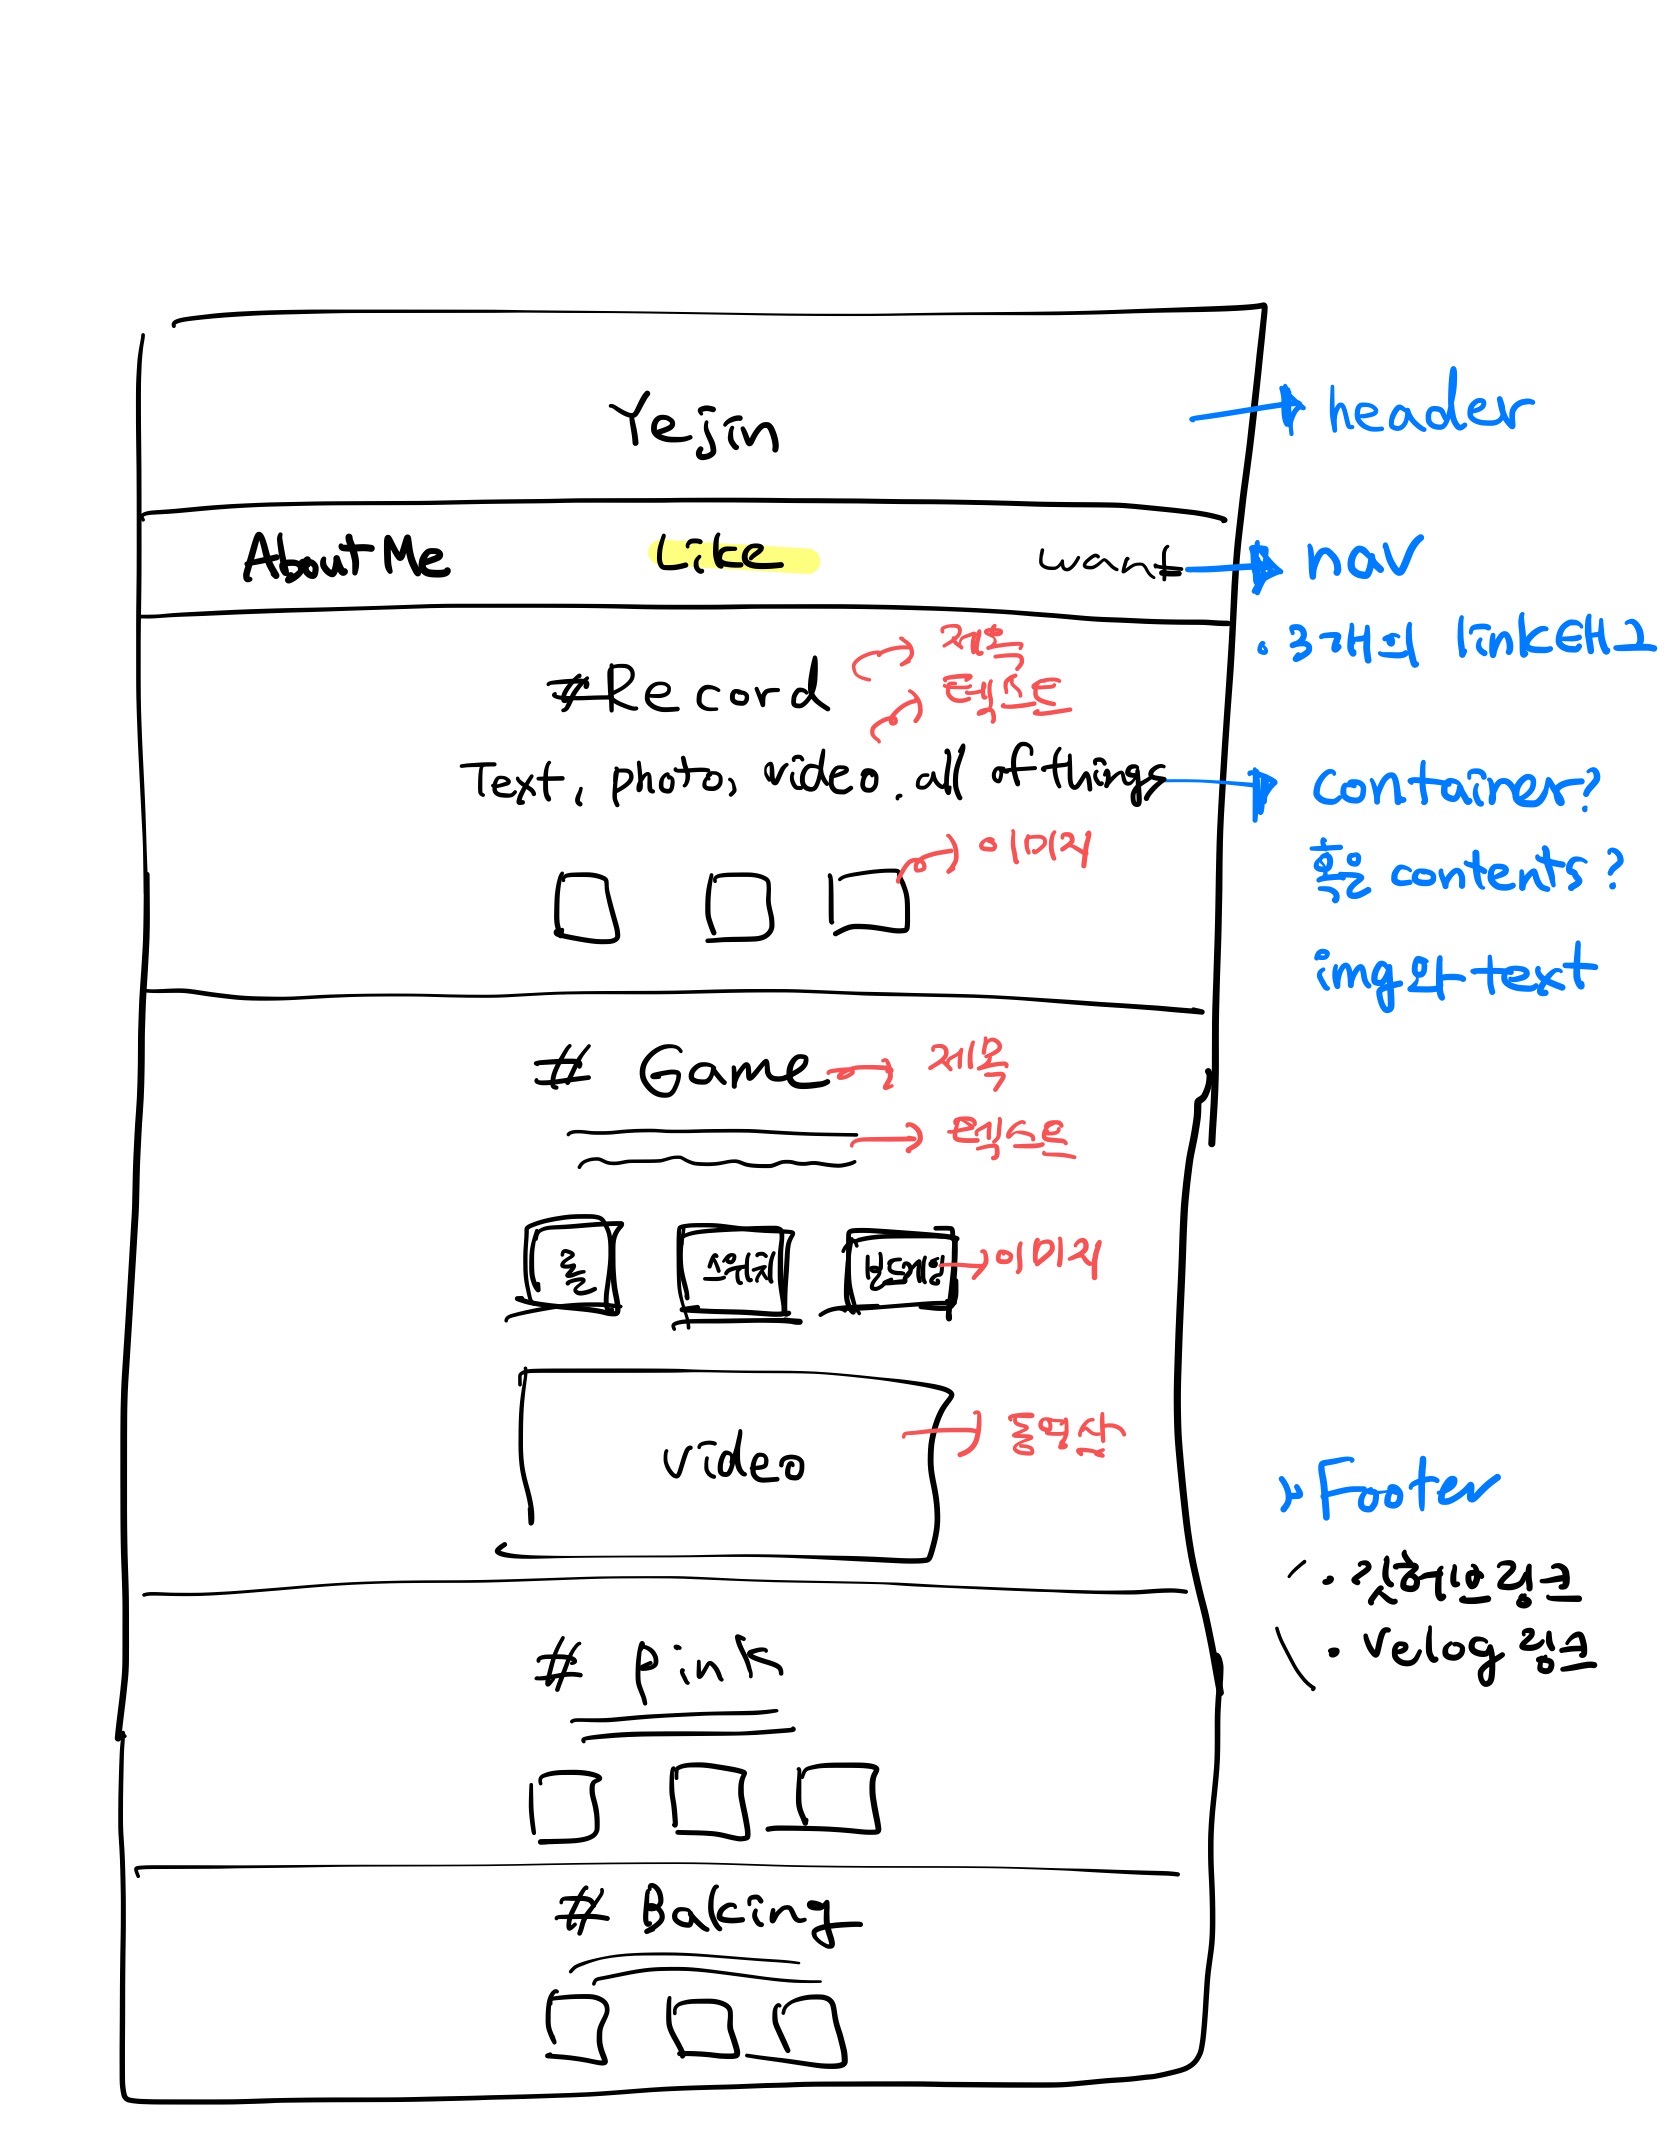

아래는 주어진 이미지를 바탕으로 인스타그램 스타일의 웹사이트를 만드는 HTML 코드입니다. 좌우 여백을 주고, 각 섹션을 스타일링하여 인스타그램 느낌을 살렸습니다.

```html
<!DOCTYPE html>
<html lang="ko">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Yejin's Page</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
            background-color: #fafafa;
        }
        .container {
            max-width: 800px;
            margin: 0 auto;
            padding: 20px;
            background-color: #fff;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        header {
            text-align: center;
            padding: 20px 0;
            font-size: 2em;
            font-weight: bold;
        }
        nav {
            display: flex;
            justify-content: space-around;
            padding: 10px 0;
            border-bottom: 1px solid #ddd;
        }
        nav a {
            text-decorat

In [24]:
# 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "https://velog.velcdn.com/images%2Fyejin20%2Fpost%2F7f896d69-1b0b-4009-a703-2869c106635f%2FIMG_0436.JPG"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm_with_prompt.stream(IMAGE_PATH_FROM_FILE)

# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)